# Week 6 - Bivariate Analysis, part 2

# 1. Lesson: no lesson this week

# 2. Weekly graph question

Suppose you wanted to show the nitrate and phosphate level in a water sample.  What are the advantages and disadvantages of showing this as an area plot, as opposed to two separate line graphs?  How would you adjust the graphs shown to improve the presentation?

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

/tmp/ipykernel_6305/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

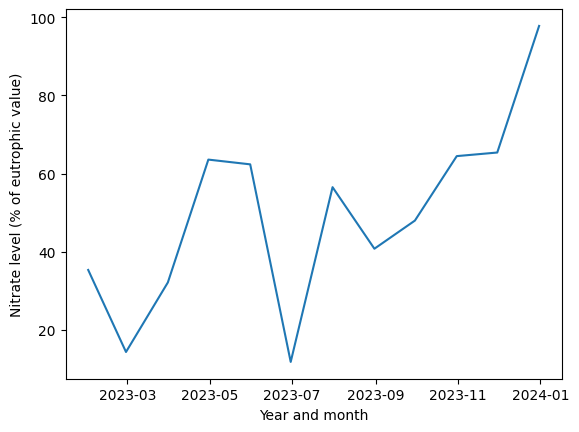

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/tmp/ipykernel_6305/1726504607.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

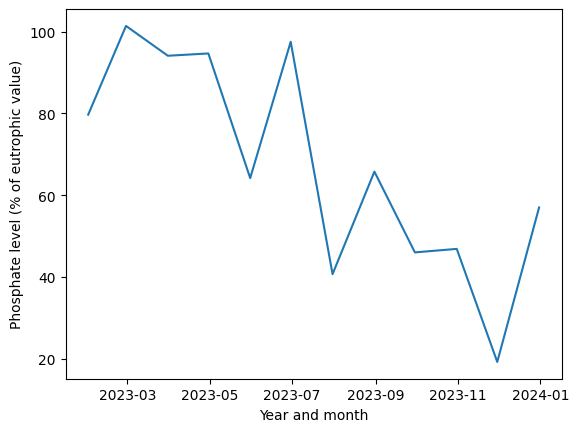

In [3]:
np.random.seed(1)
time_series_2 =  100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series_2)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

<Axes: >

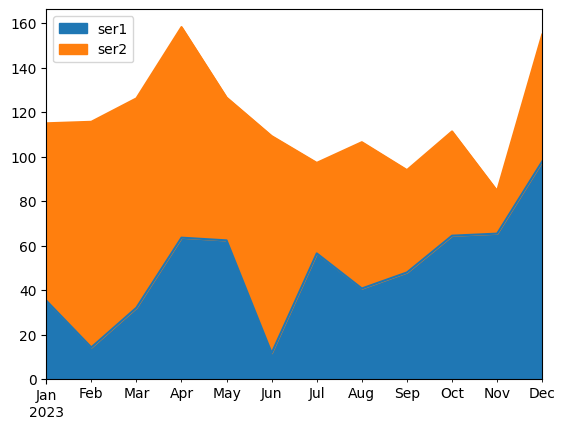

In [4]:
df = pd.DataFrame({'ser1': time_series, 'ser2': time_series_2}, index = datearray)
df.plot.area()

In [5]:
#advantages Area Plot:
#visual impact - can effectively show the cummultive or comparative levels of two variables
#overlap emphasis - they can emphasize changes in total levels and interactions between nitrate and phosphate
#disadvatges:
#clarity - overlapping areas can make it difficult to distinguish individuals trends
#detail loss - specific values and small variations might be harder to discern compared to line graphs

#advantages Line Graph:
#Clarity: Line graphs provide a clear view of the trend for each variable independently, making it easy to see exact values at any point in time.
#Precision: They allow for more precise comparison between the variables.
#Disadvantages:
#Comparative Analysis: It may be less visually intuitive to compare the magnitude of values between the two variables over time.
#Adjusting the Graphs
#To improve the presentation, consider the following adjustments:
#For Area Plots:
#Use semi-transparent colors to avoid complete overlap and enhance clarity.
#Clearly label each area and use a legend to distinguish between nitrate and phosphate levels.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Find correlations between pairs of variables.

- Draw scatterplots, especially when the correlation is large.

- Draw pairplots.

- Draw line graphs and/or area graphs when there is date or time data together with numerical data.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If the data are not useable, find some new data!

- Do you see any outliers?  (Data points that are far from the rest of the data).

- Are any data items highly correlated with each other, suggesting that they are redundant?

- For the line plots, do you see a trend or pattern over time?  Does this suggest that the data are changing over time (drifting) in such a way as to invalidate comparisons?

- Can you think of any confounding variables?  (Third variables that could explain any correlations between other variables.  These third variables may or may not be reported in the dataset.)

Top correlations (|r| > 0.5):
Petroleum_Millionbarrels vs Natural_Gas_BillionCBF: r = 0.9522
Natural_Gas_BillionCBF vs Petroleum_Millionbarrels: r = 0.9522
Fuel_Ethanol_MIllionBarrel vs Petroleum_Millionbarrels: r = 0.8762
Petroleum_Millionbarrels vs Fuel_Ethanol_MIllionBarrel: r = 0.8762
Natural_Gas_BillionCBF vs Fuel_Ethanol_MIllionBarrel: r = 0.8619
Fuel_Ethanol_MIllionBarrel vs Natural_Gas_BillionCBF: r = 0.8619
Fuel_Ethanol_MIllionBarrel vs BioDiesel_MillionBarrel: r = 0.7571
BioDiesel_MillionBarrel vs Fuel_Ethanol_MIllionBarrel: r = 0.7571
Petroleum_Millionbarrels vs Wind_Billionkwzhr: r = 0.7460
Wind_Billionkwzhr vs Petroleum_Millionbarrels: r = 0.7460


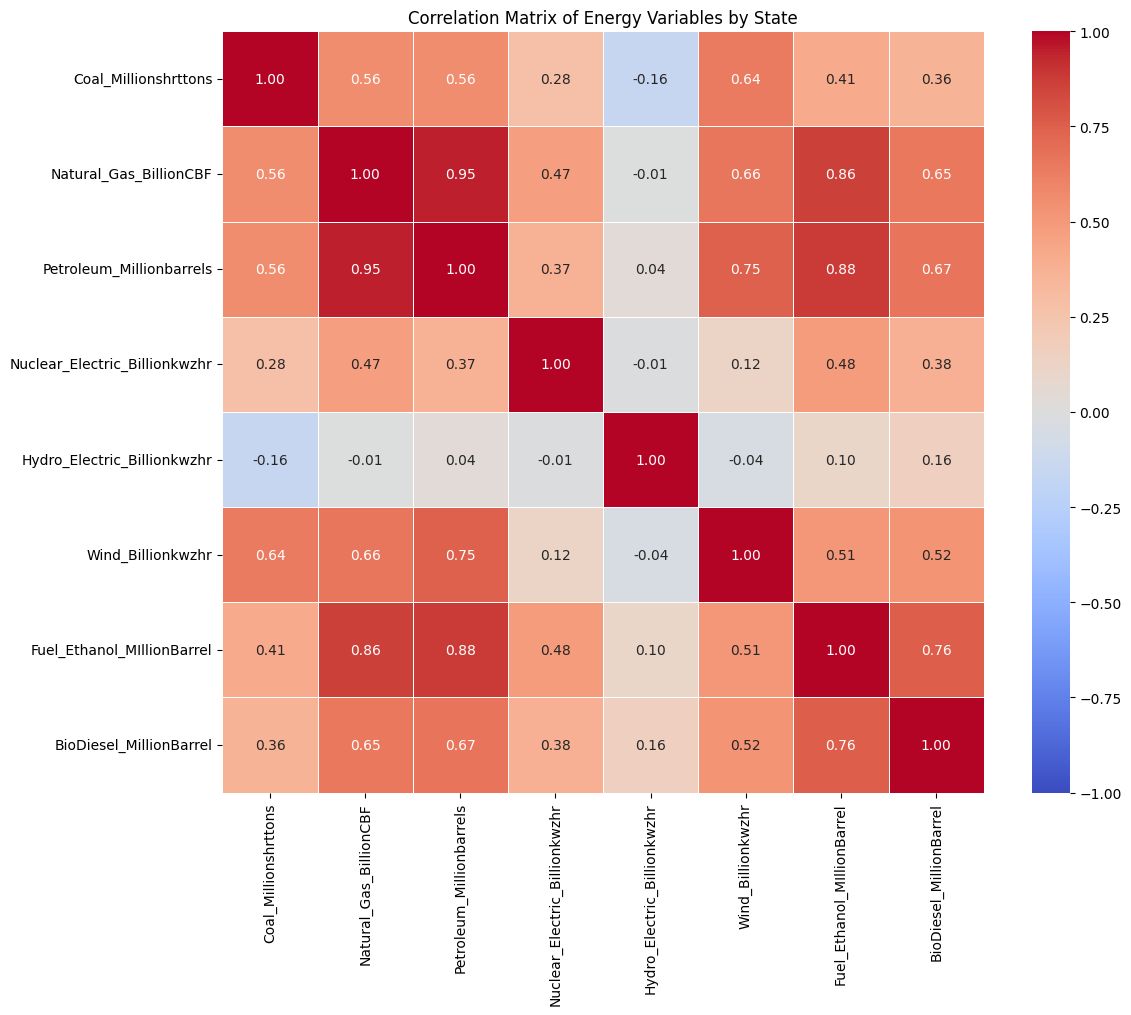

<Figure size 1200x1000 with 0 Axes>

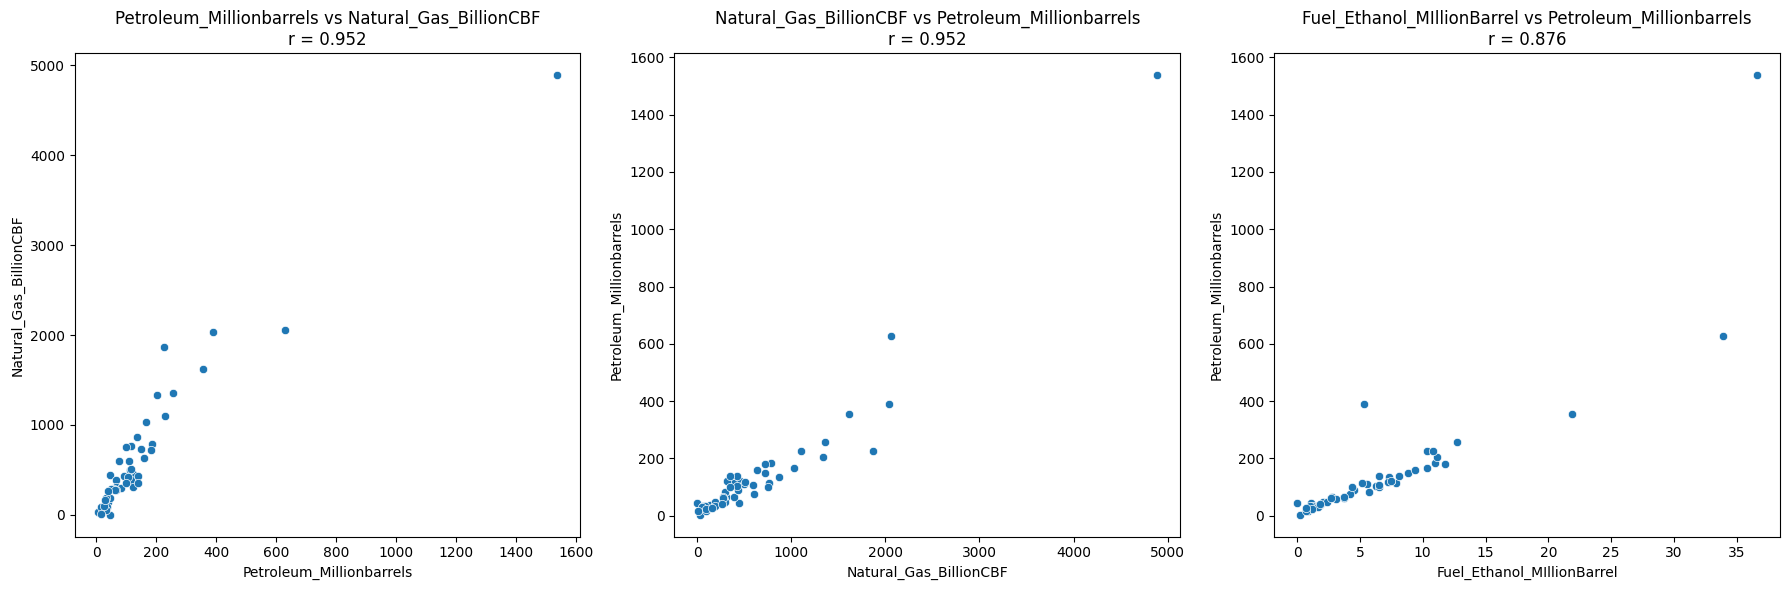

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean the data
def analyze_energy_correlations(file_path):
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Clean the data
    df = df.replace('(s)', np.nan)  # Replace special values
    
    # Remove commas and convert to float
    for col in df.columns:
        if col != 'State':
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    
    # Remove the United States row (contains totals)
    df = df[df['State'] != 'United States']
    
    # Get only numeric columns
    numeric_df = df.drop('State', axis=1)
    
    # Calculate correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Create visualizations
    
    # 1. Heatmap of correlation matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, 
                linewidths=0.5, fmt='.2f', square=True)
    plt.title('Correlation Matrix of Energy Variables by State')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png')
    
    # 2. Correlation network plot (for strongest correlations)
    plt.figure(figsize=(12, 10))
    
    # Get correlations in a format for plotting
    corrs = corr_matrix.unstack().reset_index()
    corrs.columns = ['Var1', 'Var2', 'Correlation']
    
    # Filter to remove self-correlations and keep only strong correlations
    corrs = corrs[corrs['Var1'] != corrs['Var2']]
    strong_corrs = corrs[abs(corrs['Correlation']) > 0.5].sort_values(by='Correlation', ascending=False)
    
    # Print top correlations
    print("Top correlations (|r| > 0.5):")
    for _, row in strong_corrs.head(10).iterrows():
        print(f"{row['Var1']} vs {row['Var2']}: r = {row['Correlation']:.4f}")
    
    # Plot the top 3 correlations as scatter plots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i in range(min(3, len(strong_corrs))):
        var1 = strong_corrs.iloc[i]['Var1']
        var2 = strong_corrs.iloc[i]['Var2']
        corr = strong_corrs.iloc[i]['Correlation']
        
        sns.scatterplot(x=var1, y=var2, data=df, ax=axes[i])
        axes[i].set_title(f'{var1} vs {var2}\nr = {corr:.3f}')
    
    plt.tight_layout()
    plt.savefig('top_correlations_scatter.png')
    
    # Return the correlation matrix for further analysis
    return corr_matrix

if __name__ == "__main__":
    # Run the analysis
    corr_matrix = analyze_energy_correlations('HW4_Energy_USA.csv')
    
    # Display the plots
    plt.show()

Found 5 variable pairs with |r| >= 0.7:
Natural_Gas_BillionCBF vs Petroleum_Millionbarrels: r = 0.9522
Petroleum_Millionbarrels vs Fuel_Ethanol_MIllionBarrel: r = 0.8762
Natural_Gas_BillionCBF vs Fuel_Ethanol_MIllionBarrel: r = 0.8619
Fuel_Ethanol_MIllionBarrel vs BioDiesel_MillionBarrel: r = 0.7571
Petroleum_Millionbarrels vs Wind_Billionkwzhr: r = 0.7460


/tmp/ipykernel_6305/3869618613.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('hsv', n_states)


Created: scatter-Natural-Gas-BillionCBF-vs-Petroleum-Millionbarrels-color.png
Created: scatter-Petroleum-Millionbarrels-vs-Fuel-Ethanol-MIllionBarrel-color.png
Created: scatter-Natural-Gas-BillionCBF-vs-Fuel-Ethanol-MIllionBarrel-color.png
Created: scatter-Fuel-Ethanol-MIllionBarrel-vs-BioDiesel-MillionBarrel-color.png
Created: scatter-Petroleum-Millionbarrels-vs-Wind-Billionkwzhr-color.png

All scatter plots created successfully.


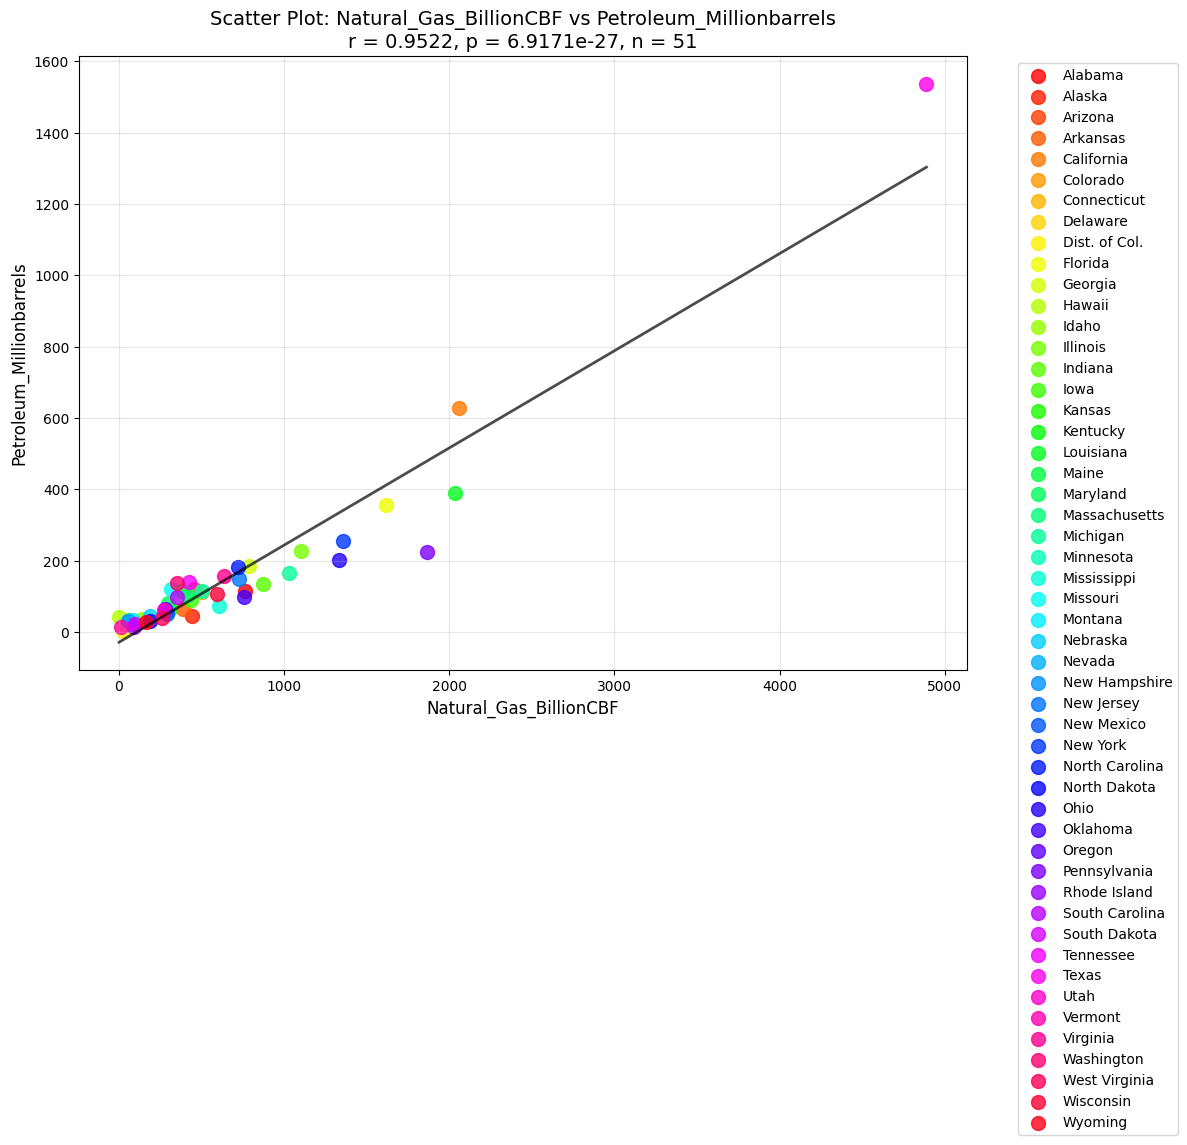

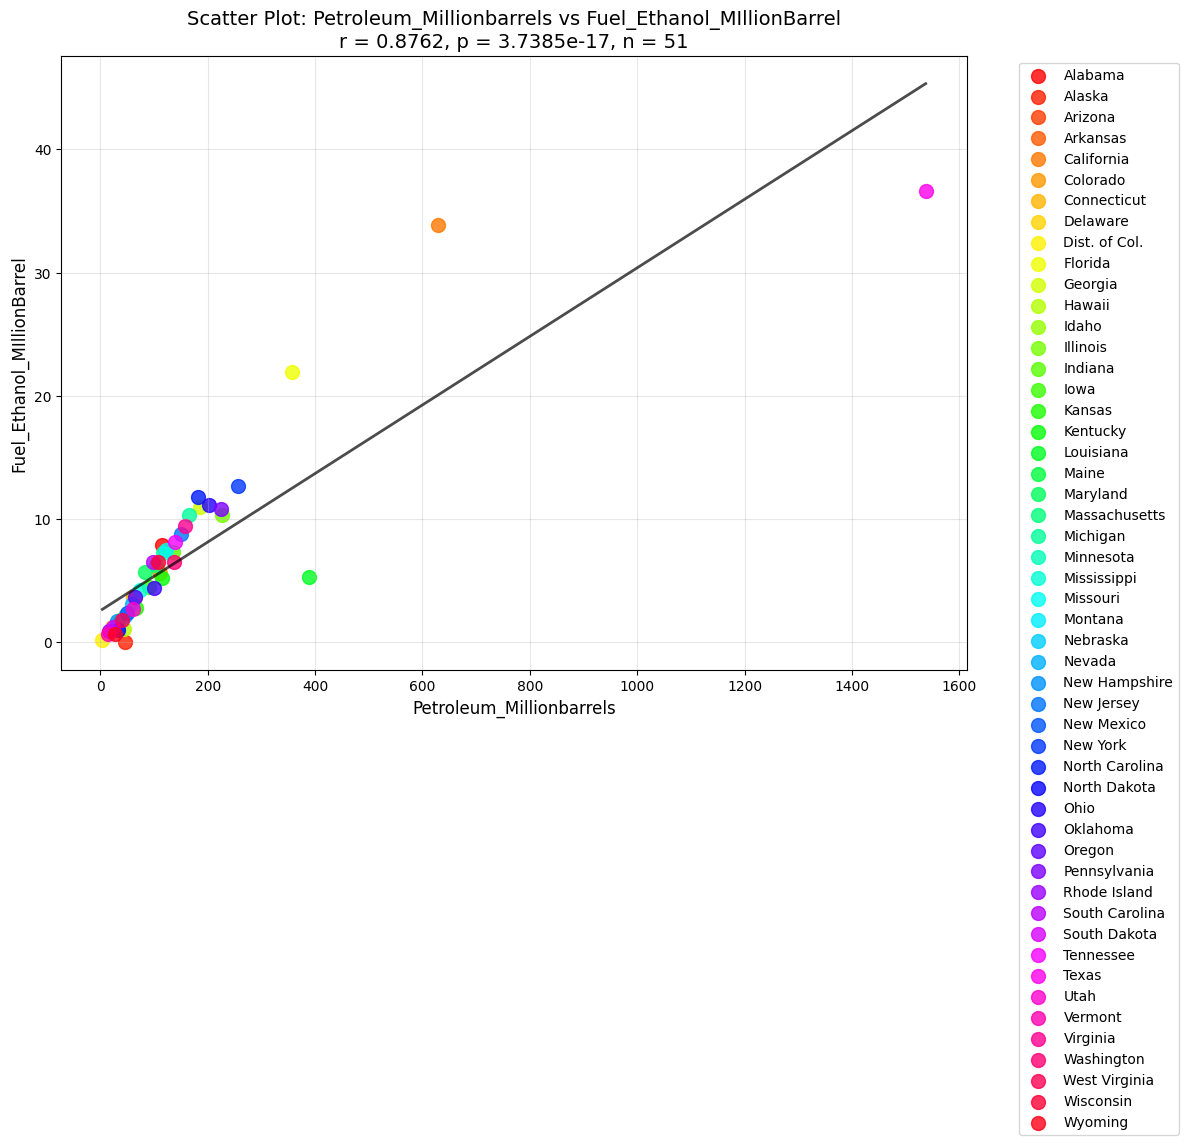

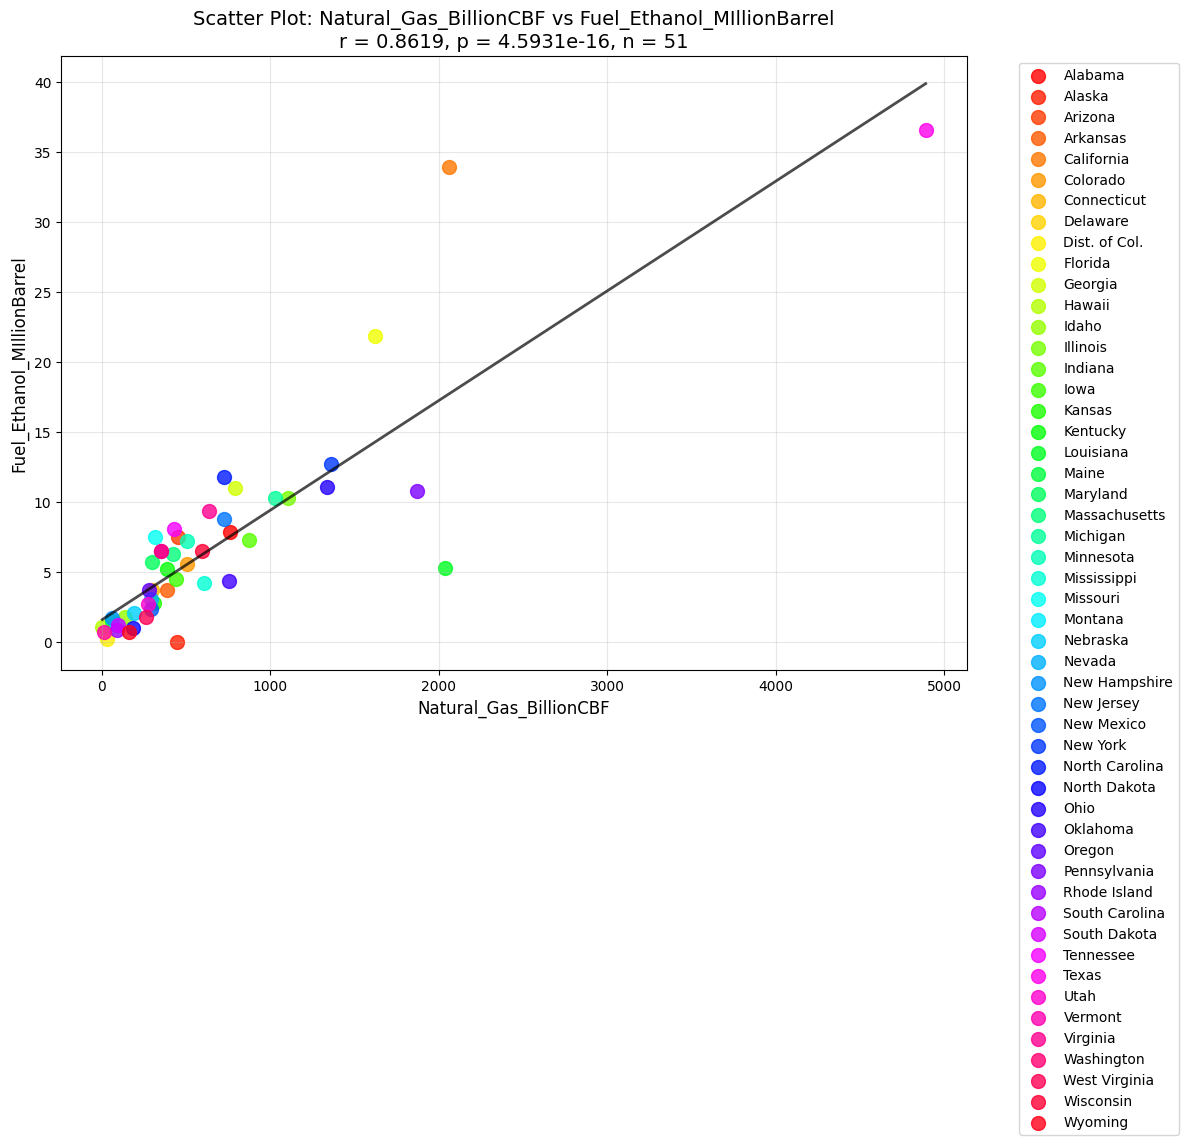

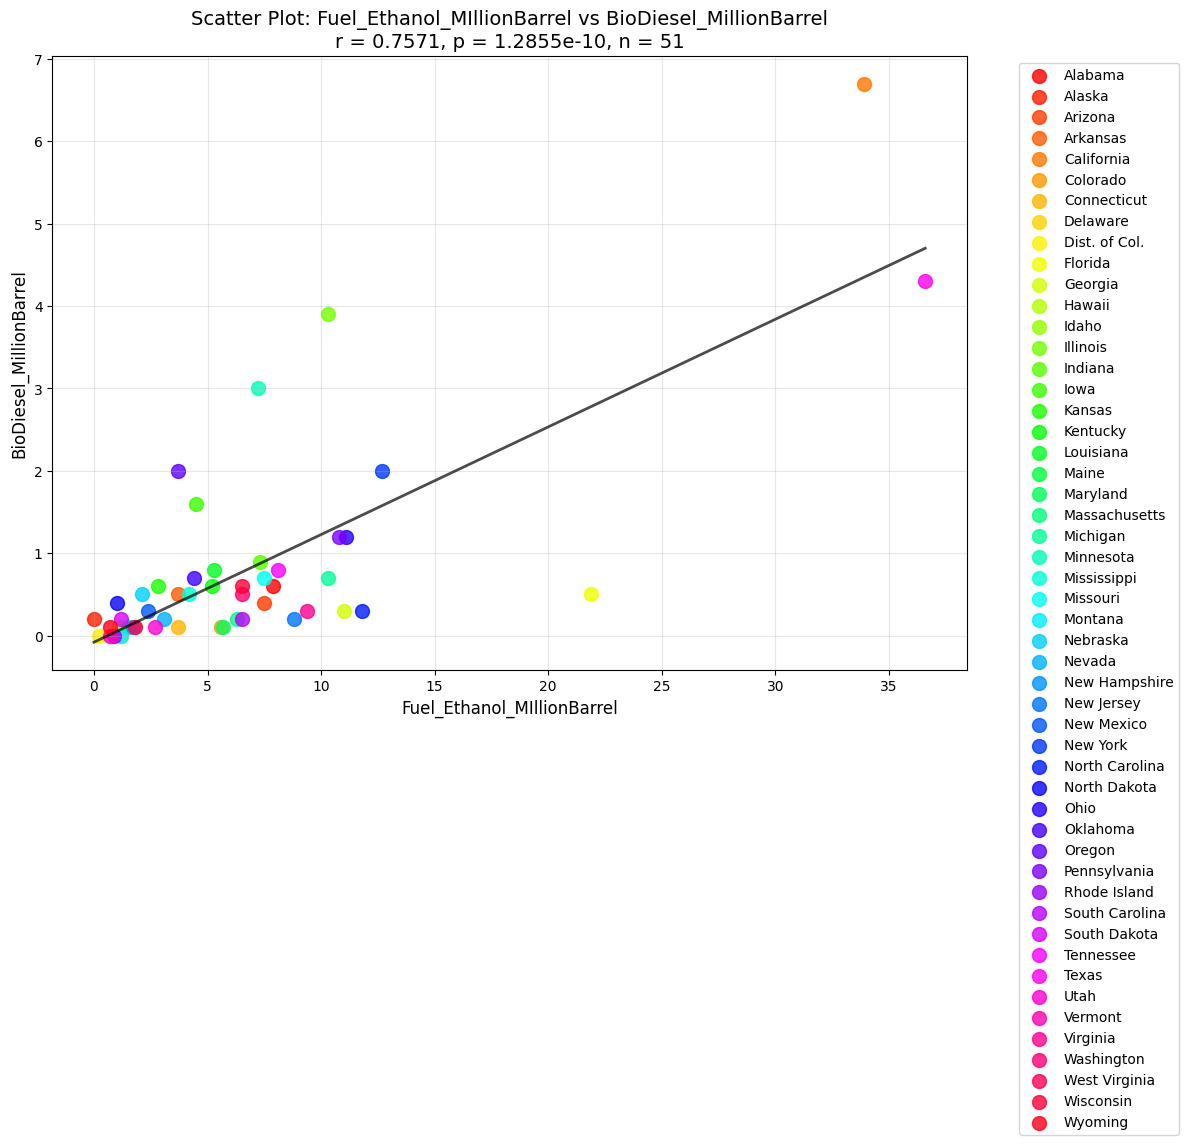

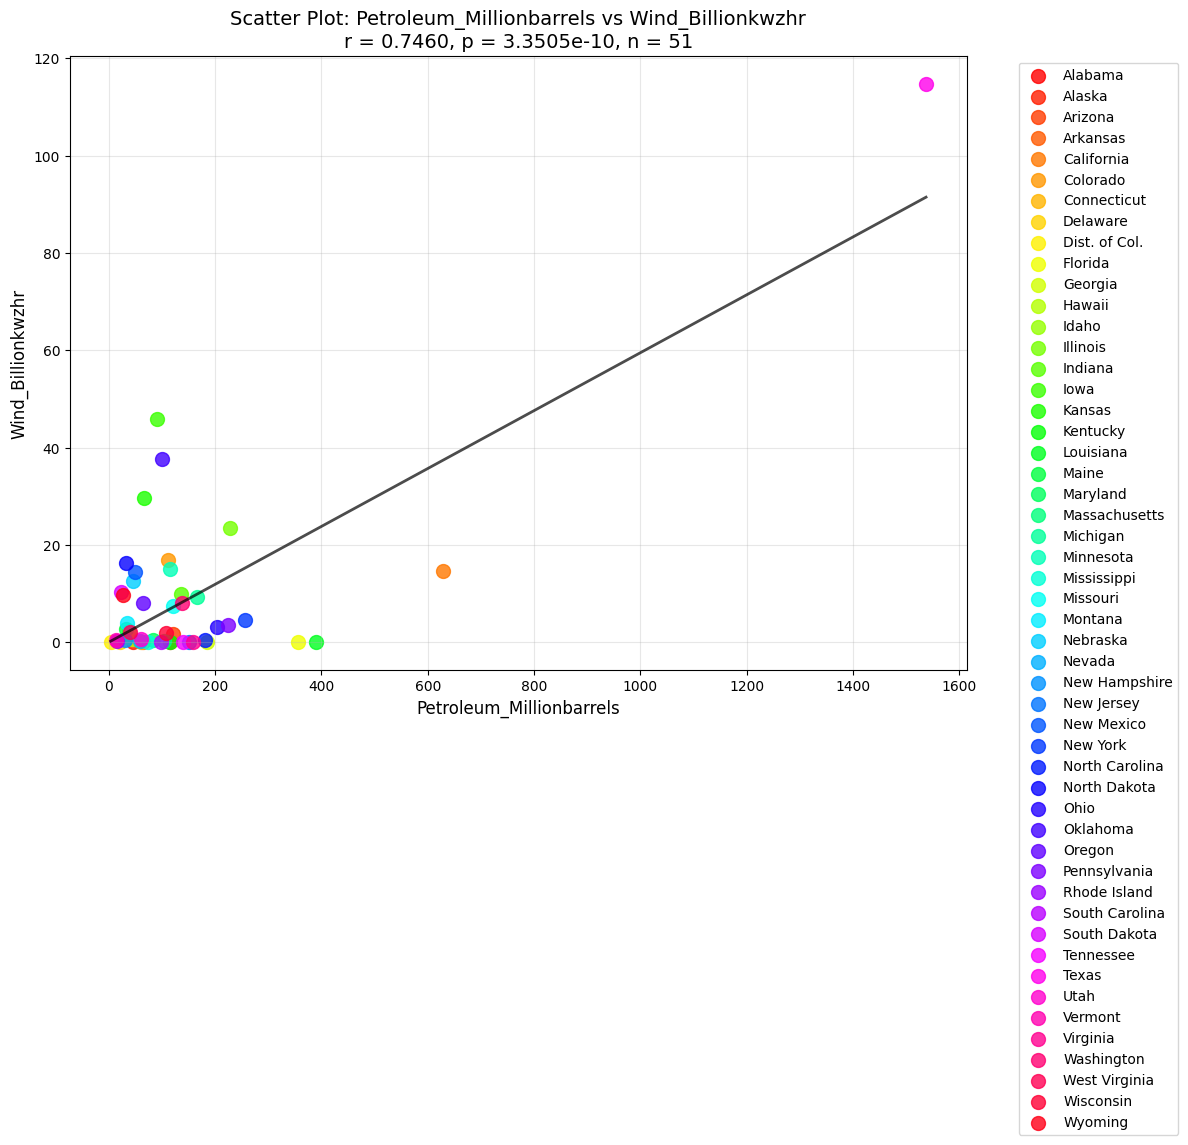

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.colors as mcolors

def create_energy_scatterplots(file_path, correlation_threshold=0.6):
    """
    Create scatter plots for highly correlated variables in the energy dataset.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file with energy data
    correlation_threshold : float
        Minimum absolute correlation value to include in scatter plots
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Clean the data
    df = df.replace('(s)', np.nan)  # Replace special values
    
    # Remove commas and convert to float
    for col in df.columns:
        if col != 'State':
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    
    # Remove the United States row (contains totals)
    df = df[df['State'] != 'United States']
    
    # Get only numeric columns
    numeric_cols = df.columns.drop('State')
    
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Create a list of variable pairs with high correlation
    high_corr_pairs = []
    
    for i, col1 in enumerate(numeric_cols):
        for j, col2 in enumerate(numeric_cols):
            if i < j:  # Only consider each pair once
                corr = corr_matrix.loc[col1, col2]
                if abs(corr) >= correlation_threshold:
                    high_corr_pairs.append({
                        'var1': col1,
                        'var2': col2,
                        'corr': corr
                    })
    
    # Sort by absolute correlation (highest first)
    high_corr_pairs = sorted(high_corr_pairs, key=lambda x: abs(x['corr']), reverse=True)
    
    # Print the high correlation pairs
    print(f"Found {len(high_corr_pairs)} variable pairs with |r| >= {correlation_threshold}:")
    for pair in high_corr_pairs:
        print(f"{pair['var1']} vs {pair['var2']}: r = {pair['corr']:.4f}")
    
    # Create a colormap for states - use a colormap with distinct colors
    # Get a list of colors from a colormap
    states = df['State'].unique()
    n_states = len(states)
    
    # Create a color map that can handle the number of states
    # Use tab20 for up to 20 states, and hsv for more
    if n_states <= 20:
        cmap = plt.cm.get_cmap('tab20', n_states)
        colors = [cmap(i) for i in range(n_states)]
    else:
        cmap = plt.cm.get_cmap('hsv', n_states)
        colors = [cmap(i) for i in range(n_states)]
    
    # Create a dictionary mapping states to colors
    state_colors = dict(zip(states, colors))
    
    # Create scatter plots
    for i, pair in enumerate(high_corr_pairs):
        var1 = pair['var1']
        var2 = pair['var2']
        corr = pair['corr']
        
        # Create figure
        plt.figure(figsize=(12, 10))
        
        # Plot each state with its assigned color
        for state in states:
            state_data = df[df['State'] == state]
            if not state_data.empty and not np.isnan(state_data[var1].iloc[0]) and not np.isnan(state_data[var2].iloc[0]):
                plt.scatter(
                    state_data[var1],
                    state_data[var2],
                    color=state_colors[state],
                    s=100,
                    label=state,
                    alpha=0.8
                )
        
        # Calculate regression line
        mask = ~(np.isnan(df[var1]) | np.isnan(df[var2]))
        if sum(mask) > 1:  # Need at least 2 points for regression
            slope, intercept, r_value, p_value, std_err = stats.linregress(
                df[var1][mask], df[var2][mask]
            )
            
            # Add regression line
            x_vals = np.array([df[var1].min(), df[var1].max()])
            y_vals = intercept + slope * x_vals
            plt.plot(x_vals, y_vals, 'k-', linewidth=2, alpha=0.7)
            
            # Add statistical information
            plt.title(f'Scatter Plot: {var1} vs {var2}\n' +
                     f'r = {corr:.4f}, p = {p_value:.4e}, n = {sum(mask)}', fontsize=14)
        else:
            plt.title(f'Scatter Plot: {var1} vs {var2}\nr = {corr:.4f}', fontsize=14)
        
        # Improve layout
        plt.xlabel(var1, fontsize=12)
        plt.ylabel(var2, fontsize=12)
        plt.grid(alpha=0.3)
        
        # Add legend outside the plot
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
        plt.tight_layout()
        
        # Save figure
        filename = f'scatter_{var1}_vs_{var2}_color.png'.replace('_', '-')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"Created: {filename}")
    
    print("\nAll scatter plots created successfully.")

if __name__ == "__main__":
    # Create scatter plots for highly correlated variables
    create_energy_scatterplots('HW4_Energy_USA.csv', correlation_threshold=0.7)

Selected top variables: Petroleum_Millionbarrels, Natural_Gas_BillionCBF, Fuel_Ethanol_MIllionBarrel, BioDiesel_MillionBarrel


Colored pairplot created successfully.


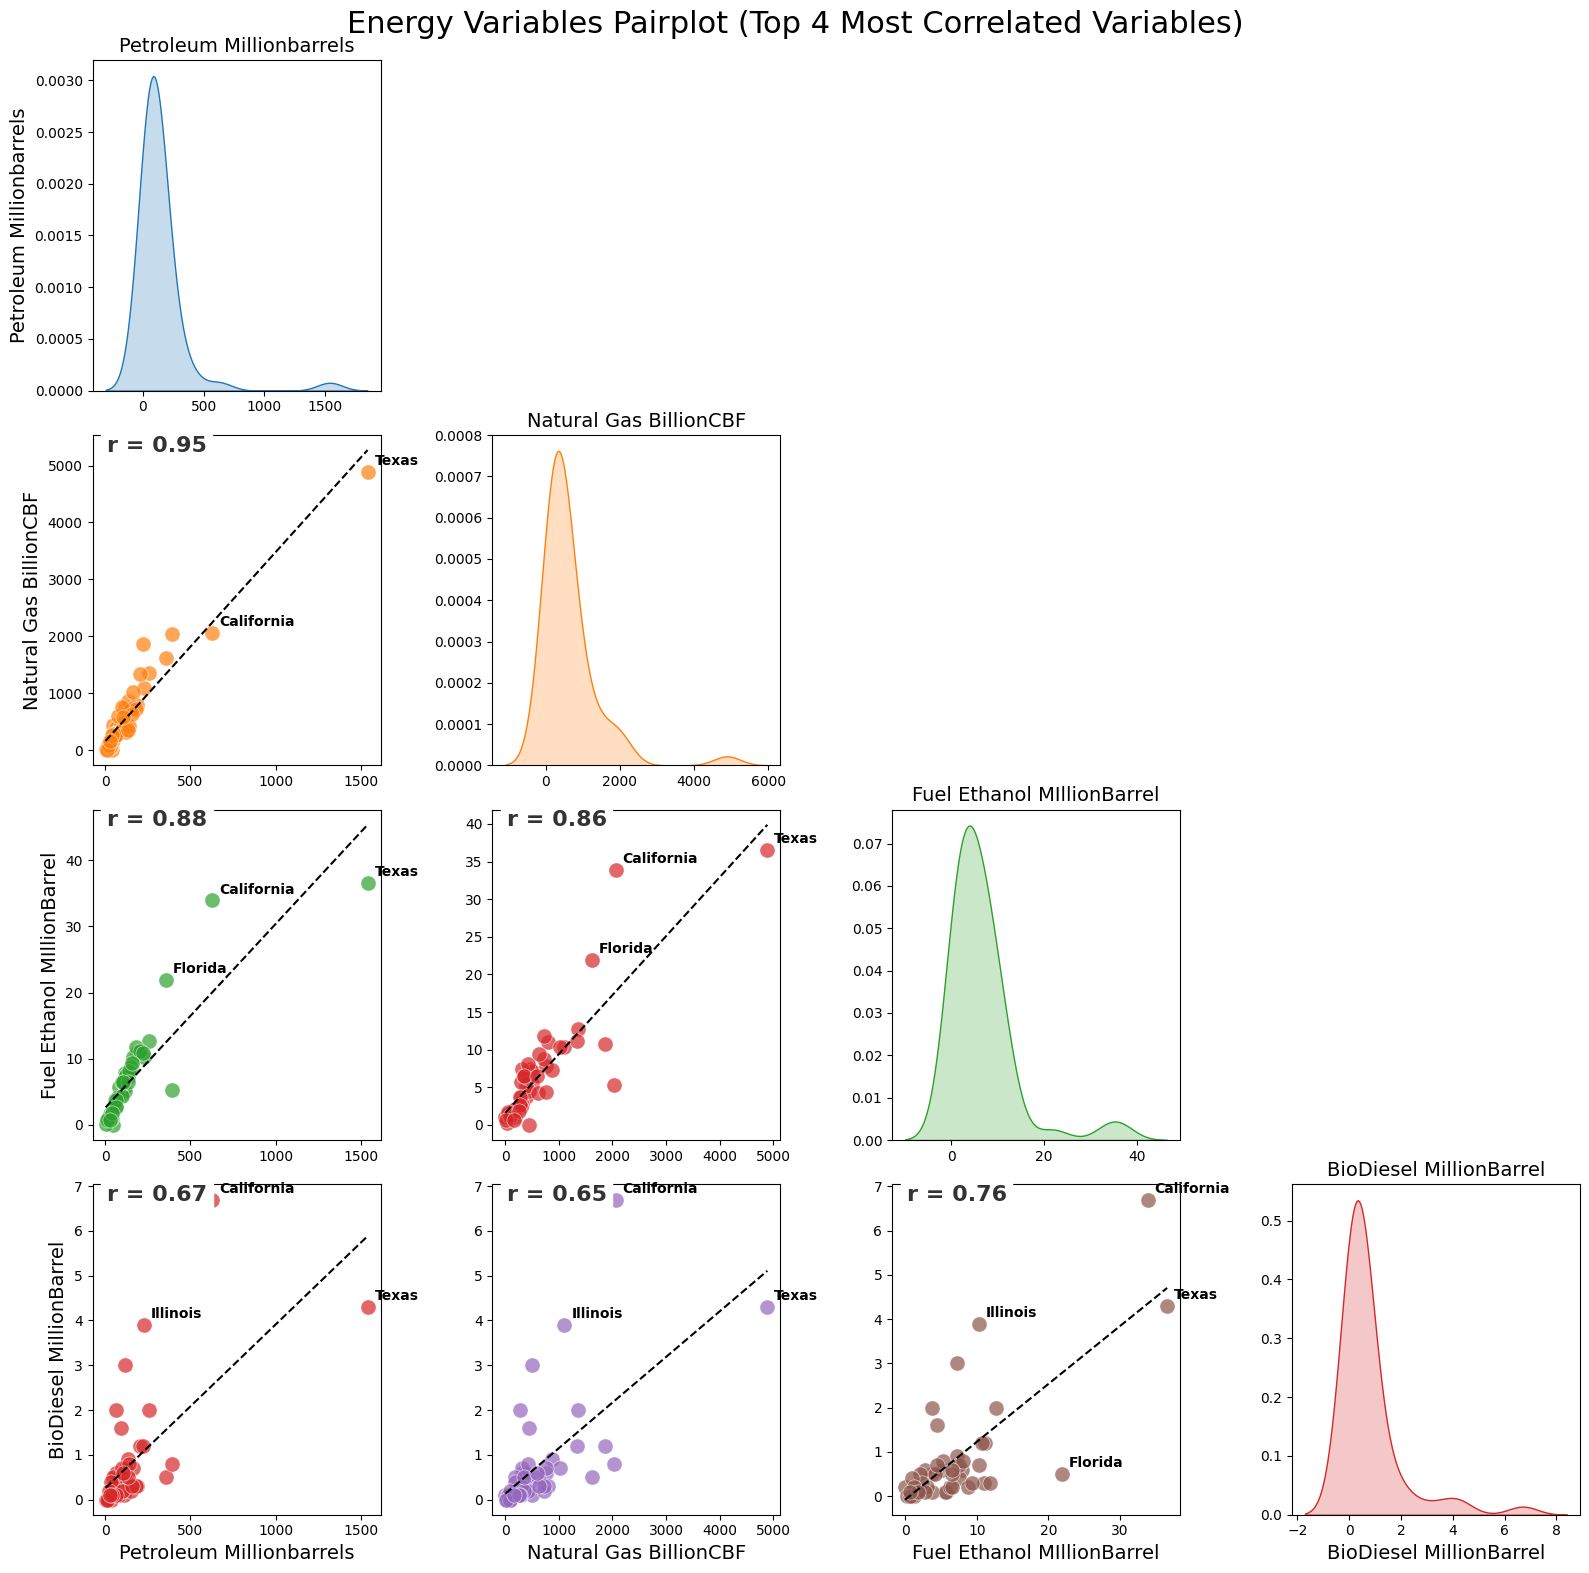

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_colored_pairplot(file_path):
    """
    Create a pairplot with different colors for each plot.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file with energy data
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Clean the data
    df = df.replace('(s)', np.nan)  # Replace special values
    
    # Remove commas and convert to float
    for col in df.columns:
        if col != 'State':
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    
    # Remove the United States row (contains totals)
    df = df[df['State'] != 'United States']
    
    # Calculate correlation matrix
    numeric_cols = df.columns.drop('State')
    corr_matrix = df[numeric_cols].corr().abs()
    
    # For each variable, calculate the sum of its correlations with other variables
    corr_sum = corr_matrix.sum() - 1  # Subtract 1 to remove self-correlation
    
    # Get the top 4 variables with highest correlations
    top_variables = corr_sum.sort_values(ascending=False).head(4).index.tolist()
    
    print(f"Selected top variables: {', '.join(top_variables)}")
    
    # Define colors for each variable pair
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
    
    # Create custom pairplot
    fig, axes = plt.subplots(len(top_variables), len(top_variables), figsize=(16, 16))
    
    # Create plots for each variable pair
    for i, var1 in enumerate(top_variables):
        for j, var2 in enumerate(top_variables):
            ax = axes[i, j]
            
            if i == j:  # Diagonal - plot distribution
                sns.kdeplot(df[var1], ax=ax, fill=True, color=colors[i % len(colors)])
                ax.set_title(var1.replace('_', ' '), fontsize=14)
            elif i > j:  # Lower triangle - scatter plots with different colors
                color_idx = (i + j) % len(colors)
                scatter = ax.scatter(
                    df[var2], 
                    df[var1], 
                    s=120, 
                    alpha=0.7, 
                    c=colors[color_idx],
                    edgecolor='white',
                    linewidth=0.5
                )
                
                # Add correlation value
                corr = df[var1].corr(df[var2])
                ax.annotate(
                    f"r = {corr:.2f}",
                    xy=(0.05, 0.95),
                    xycoords='axes fraction',
                    fontsize=16,
                    fontweight='bold',
                    backgroundcolor='white',
                    alpha=0.8
                )
                
                # Add regression line
                m, b = np.polyfit(df[var2].dropna(), df[var1].dropna(), 1)
                x_range = np.linspace(df[var2].min(), df[var2].max(), 100)
                ax.plot(x_range, m * x_range + b, color='black', linestyle='--', linewidth=1.5)
                
                # Label outliers
                x = df[var2]
                y = df[var1]
                x_zscore = (x - x.mean()) / x.std()
                y_zscore = (y - y.mean()) / y.std()
                
                for k, state in enumerate(df['State']):
                    if abs(x_zscore.iloc[k]) > 2 or abs(y_zscore.iloc[k]) > 2:
                        ax.annotate(
                            state,
                            (x.iloc[k], y.iloc[k]),
                            fontsize=10,
                            xytext=(5, 5),
                            textcoords='offset points',
                            fontweight='bold'
                        )
            else:  # Upper triangle - leave empty
                ax.axis('off')
            
            # Only show labels on the left and bottom edges
            if j == 0:
                ax.set_ylabel(var1.replace('_', ' '), fontsize=14)
            else:
                ax.set_ylabel('')
                
            if i == len(top_variables) - 1:
                ax.set_xlabel(var2.replace('_', ' '), fontsize=14)
            else:
                ax.set_xlabel('')
    
    # Add overall title
    plt.suptitle('Energy Variables Pairplot (Top 4 Most Correlated Variables)', 
               fontsize=22, y=0.98)
    
    plt.tight_layout()
    
    # Save the plot
    plt.savefig('colored_energy_pairplot.png', dpi=300, bbox_inches='tight')
    print("Colored pairplot created successfully.")
    
    return fig

if __name__ == "__main__":
    # Create a colored pairplot
    pairplot = create_colored_pairplot('HW4_Energy_USA.csv')
    plt.show()

In [12]:
#Based on the correlation analysis of the energy dataset, here are my conclusions:

### Conclusions from the Analysis

#The data on US energy sources by state shows several strong and meaningful relationships. The data appears to be usable and coherent, revealing expected patterns in energy production and consumption across states.

#The strongest correlations involve:
#- Natural Gas and Petroleum (r ≈ 0.95)
#- Petroleum and Fuel Ethanol (r ≈ 0.88)
#- Natural Gas and Fuel Ethanol (r ≈ 0.86)
#- Fuel Ethanol and Biodiesel (r ≈ 0.76)

#These correlations make sense from an energy infrastructure perspective, as states with higher fossil fuel consumption also tend to have higher biofuel production, likely due to both population/economic factors and energy policy decisions.

### Outliers

#Several notable outliers appear in the data:
#- Texas stands out with extremely high values for Natural Gas, Petroleum, and Wind energy
#- California shows high values for Natural Gas and Petroleum
#- Iowa and Illinois show disproportionately high values for Fuel Ethanol compared to their size
#- Washington appears as an outlier for Hydroelectric power

#These outliers aren't necessarily errors but reflect the unique energy profiles of these states based on their geography, resources, and economic activities.

### Redundant Variables

#The very high correlation (r ≈ 0.95) between Natural Gas and Petroleum suggests these variables may be somewhat redundant. This strong relationship indicates that states consuming high amounts of one fossil fuel tend to consume high amounts of the other as well.

#Similarly, the strong correlations between Fuel Ethanol and both Natural Gas and Petroleum (r > 0.85) suggest these variables capture related information about energy consumption patterns in states.

### Potential Confounding Variables

#Several potential confounding variables might explain the observed correlations:

#1. **Population size/density**: Larger states by population will naturally consume more of all energy types.

#2. **Economic output (GDP)**: States with larger economies require more energy of all types.

#3. **Industrial composition**: States with more manufacturing or energy-intensive industries will show different patterns across energy sources.

#4. **Geographic size**: Physically larger states may require more energy for transportation.

#5. **Climate zones**: States with extreme temperatures may use more energy for heating or cooling.

#6. **Energy policy**: State-level renewable portfolio standards and fossil fuel subsidies significantly affect energy production patterns.

#7. **Resource availability**: Natural presence of resources (e.g., coal deposits, rivers for hydropower) strongly influences which energy sources dominate in a state.

#The strongest correlations (between fossil fuels and biofuels) are likely influenced heavily by population and economic factors rather than direct causal relationships between the energy sources themselves.

#To improve the analysis, controlling for these confounding variables (particularly population and GDP) would provide a clearer picture of the intrinsic relationships between different energy sources.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 86-98 of the Storytelling With Data book as best you can.  (The second half of chapter three).  You do not have to get the exact data values right, just the overall look and feel.

/tmp/ipykernel_6305/2835639284.py:65: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  stacked_bars = sns.barplot(
/tmp/ipykernel_6305/2835639284.py:96: UserWarning: The palette list has more values (9) than needed (8), which may not be intended.
  sns.barplot(


Energy comparison chart created successfully.


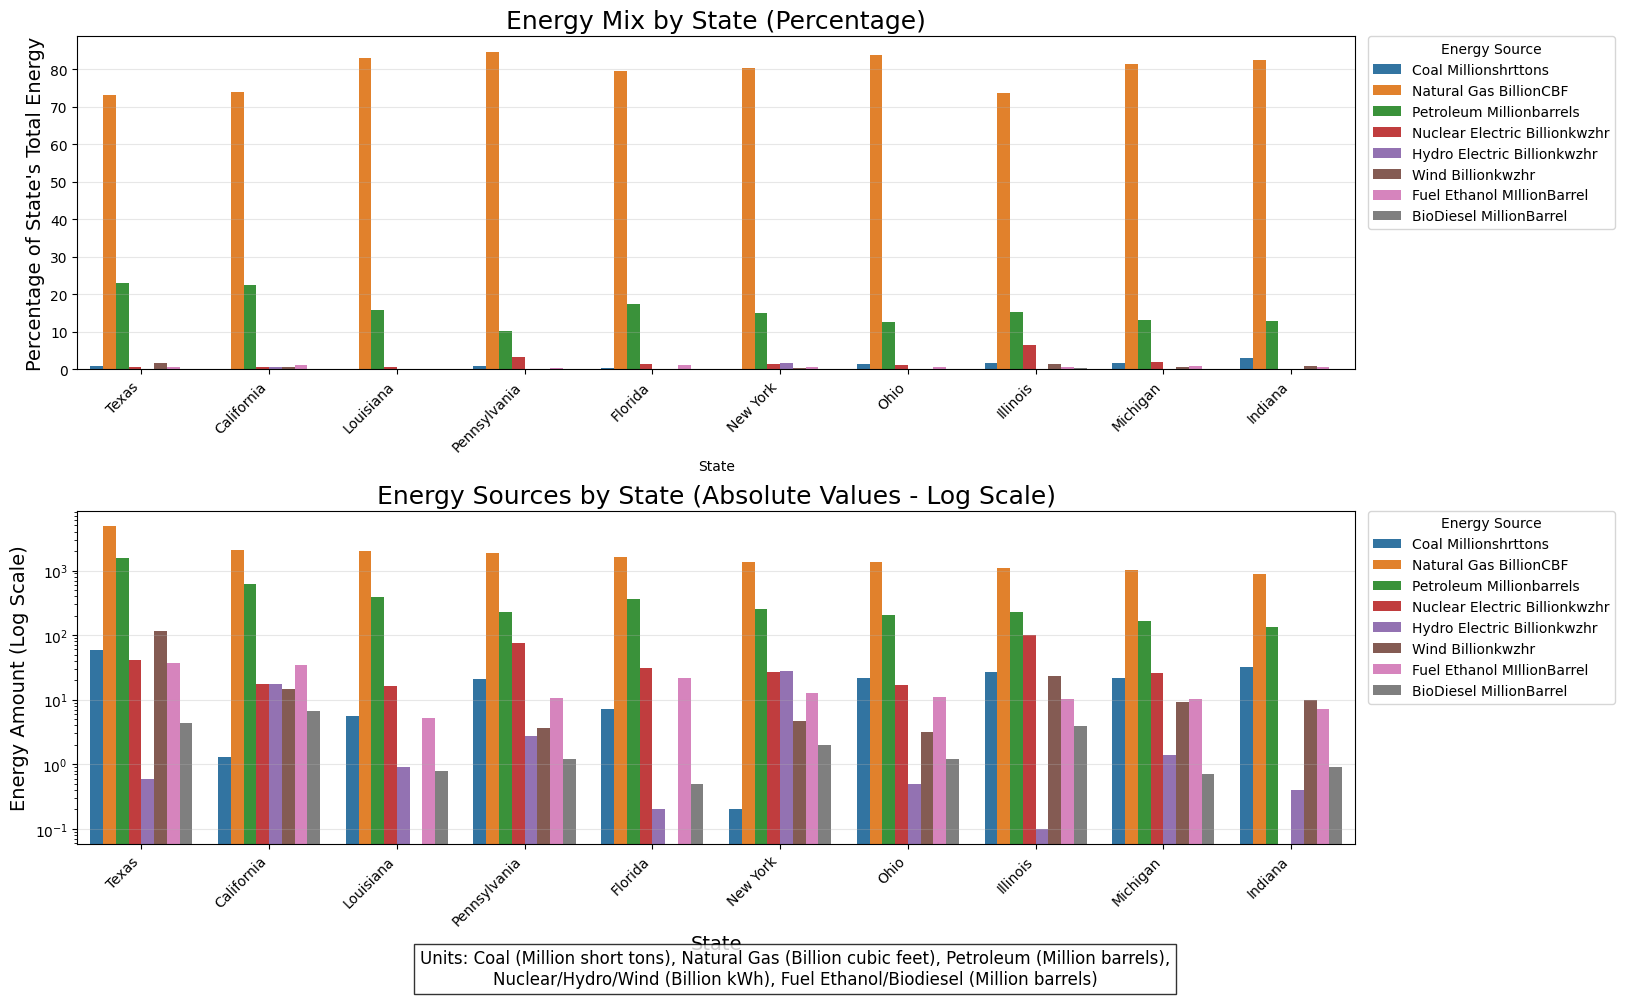

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def create_energy_comparison(file_path):
    """
    Create a visualization comparing energy sources across states with high contrast.
    
    Parameters:
    -----------
    file_path : str
        Path to the CSV file with energy data
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Clean the data
    df = df.replace('(s)', np.nan)  # Replace special values
    
    # Remove commas and convert to float
    for col in df.columns:
        if col != 'State':
            df[col] = df[col].astype(str).str.replace(',', '').astype(float)
    
    # Remove the United States row (contains totals)
    df = df[df['State'] != 'United States']
    
    # Select energy columns (excluding State)
    energy_cols = [col for col in df.columns if col != 'State']
    
    # Calculate total energy for each state (sum across all sources)
    df['Total_Energy'] = df[energy_cols].sum(axis=1)
    
    # Get the top 10 states by total energy
    top_states = df.nlargest(10, 'Total_Energy')
    
    # Create a normalized version (percentage of each state's total)
    for col in energy_cols:
        top_states[f'{col}_Pct'] = top_states[col] / top_states['Total_Energy'] * 100
    
    # Reshape the data for plotting
    pct_cols = [col for col in top_states.columns if col.endswith('_Pct')]
    melted_df = pd.melt(
        top_states, 
        id_vars=['State', 'Total_Energy'], 
        value_vars=pct_cols,
        var_name='Energy_Source', 
        value_name='Percentage'
    )
    
    # Clean up energy source names for the plot
    melted_df['Energy_Source'] = melted_df['Energy_Source'].str.replace('_Pct', '')
    melted_df['Energy_Source'] = melted_df['Energy_Source'].str.replace('_', ' ')
    
    # Set up the plot with high contrast
    plt.figure(figsize=(16, 10))
    
    # Create a custom color palette with high contrast colors
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
              '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
    
    # Create the stacked percentage bar chart
    ax1 = plt.subplot(2, 1, 1)
    stacked_bars = sns.barplot(
        x='State', 
        y='Percentage', 
        hue='Energy_Source', 
        data=melted_df,
        palette=colors
    )
    
    # Customize the percentage chart
    plt.title('Energy Mix by State (Percentage)', fontsize=18)
    plt.ylabel('Percentage of State\'s Total Energy', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Energy Source', bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.grid(axis='y', alpha=0.3)
    
    # Create a bar chart showing absolute values (log scale)
    plt.subplot(2, 1, 2)
    
    # Reshape original data for absolute values
    abs_melted = pd.melt(
        top_states, 
        id_vars=['State'], 
        value_vars=energy_cols,
        var_name='Energy_Source', 
        value_name='Amount'
    )
    
    # Clean up energy source names
    abs_melted['Energy_Source'] = abs_melted['Energy_Source'].str.replace('_', ' ')
    
    # Plot absolute values
    sns.barplot(
        x='State', 
        y='Amount', 
        hue='Energy_Source', 
        data=abs_melted,
        palette=colors
    )
    
    # Use log scale for better visibility of smaller values
    plt.yscale('log')
    
    # Customize the absolute value chart
    plt.title('Energy Sources by State (Absolute Values - Log Scale)', fontsize=18)
    plt.ylabel('Energy Amount (Log Scale)', fontsize=14)
    plt.xlabel('State', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Energy Source', bbox_to_anchor=(1.01, 1), borderaxespad=0)
    plt.grid(axis='y', alpha=0.3)
    
    # Add annotation explaining units
    plt.figtext(0.5, 0.01, 
                'Units: Coal (Million short tons), Natural Gas (Billion cubic feet), Petroleum (Million barrels),\n'
                'Nuclear/Hydro/Wind (Billion kWh), Fuel Ethanol/Biodiesel (Million barrels)',
                ha='center', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.15, right=0.85)
    
    # Save the figure
    plt.savefig('energy_comparison_chart.png', dpi=300, bbox_inches='tight')
    print("Energy comparison chart created successfully.")

if __name__ == "__main__":
    # Create energy comparison visualization
    create_energy_comparison('HW4_Energy_USA.csv')
    plt.show()